# SP 500 Dataset Exploration

We use this notebook to explore the downloaded SP 500 stock dataset.

In [1]:
import pandas as pd

df = pd.read_csv("monthly_features.csv", parse_dates=["Date"], index_col="Date")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-05-31 to 2024-11-30
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month_start            115 non-null    float64
 1   Month_end              115 non-null    float64
 2   High                   115 non-null    float64
 3   Low                    115 non-null    float64
 4   Year                   115 non-null    int64  
 5   Return_prev_month      115 non-null    float64
 6   Volatility_prev_month  115 non-null    float64
 7   Range_prev_month       115 non-null    float64
 8   MA5d_minus_MA20d       115 non-null    float64
 9   MA3m                   115 non-null    float64
 10  MA6m                   115 non-null    float64
 11  MA3m_minus_MA6m        115 non-null    float64
 12  April                  115 non-null    bool   
 13  August                 115 non-null    bool   
 14  December               115 non-null    

In [3]:
print(df.head())

            Month_start  Month_end     High      Low  Year  Return_prev_month  \
Date                                                                            
2015-05-31      2108.29    2107.39  2130.82  2080.15  2015          -0.000427   
2015-06-30      2111.73    2063.11  2124.20  2057.64  2015          -0.023024   
2015-07-31      2077.42    2103.84  2128.28  2046.68  2015           0.012718   
2015-08-31      2098.04    1972.18  2104.18  1867.61  2015          -0.059989   
2015-09-30      1913.85    1920.03  1995.31  1881.77  2015           0.003229   

            Volatility_prev_month  Range_prev_month  MA5d_minus_MA20d  \
Date                                                                    
2015-05-31               0.006810             50.67            4.4405   
2015-06-30               0.007012             66.56          -11.5195   
2015-07-31               0.007372             81.60            0.5380   
2015-08-31               0.016831            236.57          -85.59

In [4]:
print(df.columns.tolist())

['Month_start', 'Month_end', 'High', 'Low', 'Year', 'Return_prev_month', 'Volatility_prev_month', 'Range_prev_month', 'MA5d_minus_MA20d', 'MA3m', 'MA6m', 'MA3m_minus_MA6m', 'April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September', 'Label_next_month']


In [5]:
print("\nS&P500 Index:")
print(df.head())
print(f"shape: {df.shape}")


S&P500 Index:
            Month_start  Month_end     High      Low  Year  Return_prev_month  \
Date                                                                            
2015-05-31      2108.29    2107.39  2130.82  2080.15  2015          -0.000427   
2015-06-30      2111.73    2063.11  2124.20  2057.64  2015          -0.023024   
2015-07-31      2077.42    2103.84  2128.28  2046.68  2015           0.012718   
2015-08-31      2098.04    1972.18  2104.18  1867.61  2015          -0.059989   
2015-09-30      1913.85    1920.03  1995.31  1881.77  2015           0.003229   

            Volatility_prev_month  Range_prev_month  MA5d_minus_MA20d  \
Date                                                                    
2015-05-31               0.006810             50.67            4.4405   
2015-06-30               0.007012             66.56          -11.5195   
2015-07-31               0.007372             81.60            0.5380   
2015-08-31               0.016831            236.57 

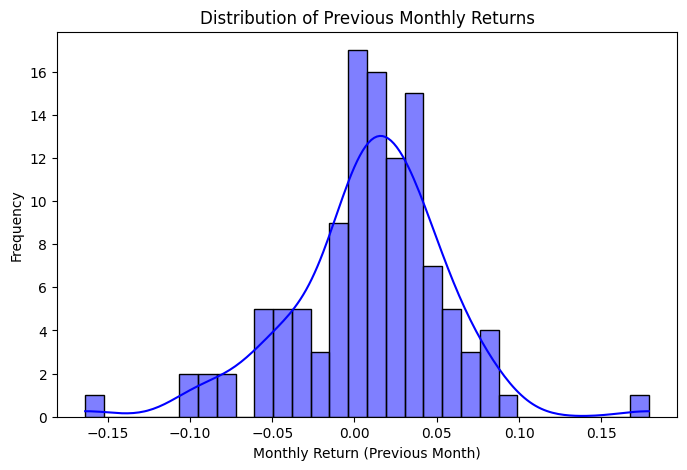

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["Return_prev_month"], bins=30, kde=True, color="blue")
plt.title("Distribution of Previous Monthly Returns")
plt.xlabel("Monthly Return (Previous Month)")
plt.ylabel("Frequency")
plt.show()

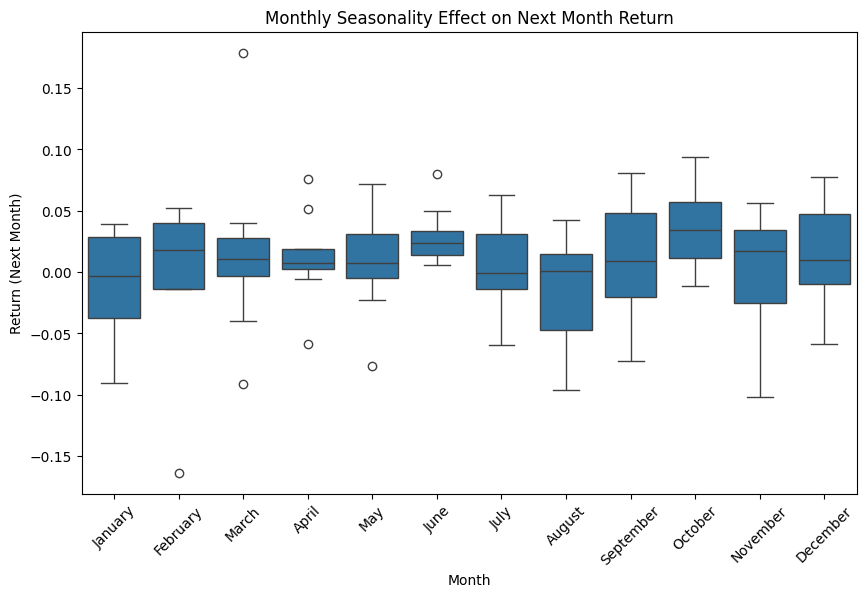

In [11]:
import calendar
plt.figure(figsize=(10,6))

df["Month_name"] = df.index.month.map(lambda x: calendar.month_name[x])
sns.boxplot(x="Month_name", y="Label_next_month", data=df, order=[
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
])
plt.xticks(rotation=45)
plt.title("Monthly Seasonality Effect on Next Month Return")
plt.xlabel("Month")
plt.ylabel("Return (Next Month)")
plt.savefig("figure2.png", dpi=300, bbox_inches="tight")
plt.show()

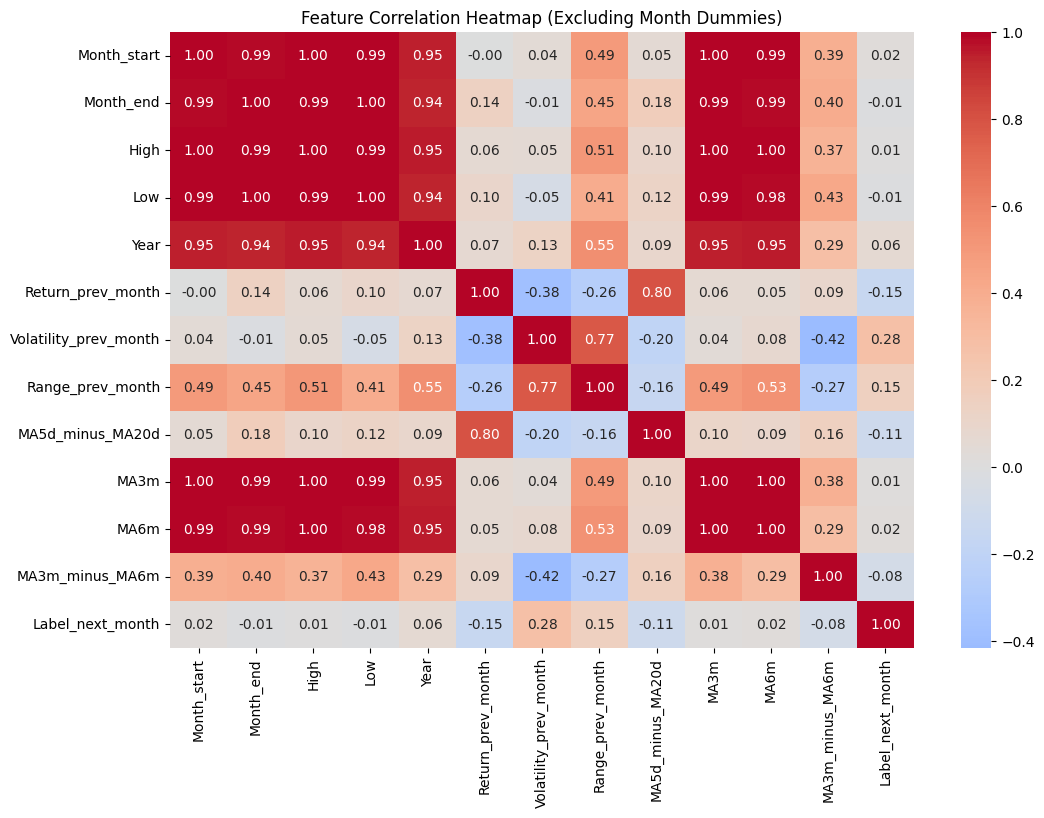

In [12]:
plt.figure(figsize=(12,8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=["float64", "int64", "bool"])

# Drop month one-hot encoded columns (January ~ December) 
# since they don't provide meaningful correlation insights
month_cols = ["January","February","March","April","May","June",
              "July","August","September","October","November","December"]
numeric_df = numeric_df.drop(columns=[c for c in month_cols if c in numeric_df.columns], errors="ignore")

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap (Excluding Month Dummies)")
plt.savefig("figure3.png", dpi=300, bbox_inches="tight")

plt.show()

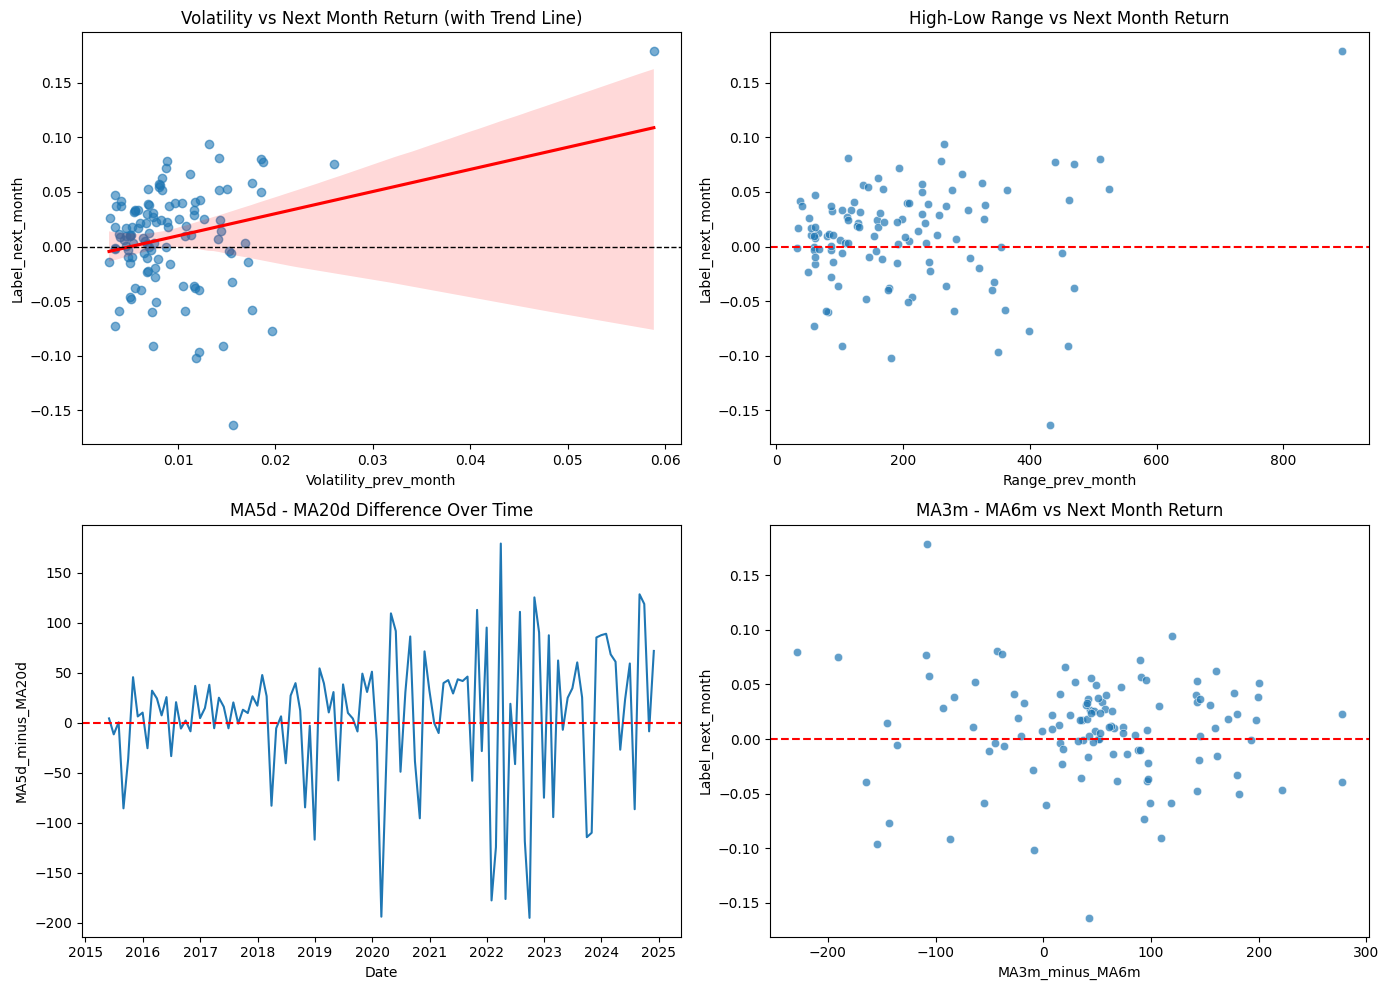

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Volatility vs Next Month Return
sns.regplot(
    x="Volatility_prev_month", 
    y="Label_next_month", 
    data=df, 
    scatter_kws={'alpha':0.6}, 
    line_kws={'color':'red'},
    ax=axes[0, 0]
)
axes[0, 0].set_title("Volatility vs Next Month Return (with Trend Line)")
axes[0, 0].axhline(0, color="black", linestyle="--", linewidth=1)

# 2. High-Low Range vs Next Month Return
sns.scatterplot(
    x=df["Range_prev_month"], 
    y=df["Label_next_month"], 
    alpha=0.7, 
    ax=axes[0, 1]
)
axes[0, 1].set_title("High-Low Range vs Next Month Return")
axes[0, 1].axhline(0, color="red", linestyle="--")

# 3. MA5d - MA20d Difference Over Time
sns.lineplot(
    x=df.index, 
    y=df["MA5d_minus_MA20d"], 
    ax=axes[1, 0]
)
axes[1, 0].set_title("MA5d - MA20d Difference Over Time")
axes[1, 0].axhline(0, color="red", linestyle="--")

# 4. MA3m - MA6m vs Next Month Return
sns.scatterplot(
    x=df["MA3m_minus_MA6m"], 
    y=df["Label_next_month"], 
    alpha=0.7, 
    ax=axes[1, 1]
)
axes[1, 1].set_title("MA3m - MA6m vs Next Month Return")
axes[1, 1].axhline(0, color="red", linestyle="--")

# Layout
plt.tight_layout()
plt.show()
